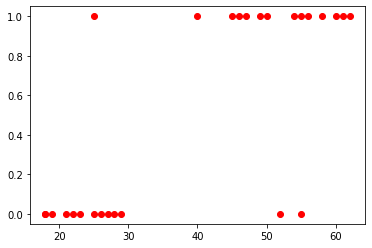

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

data=pd.read_csv("D:/PYTHON/MachineLearning/DataSets/loans_logistic.csv")
data
X=np.array(data['age']).reshape(-1,1)
#print(X)
y=data['bought_insurance'].values
plt.scatter(X,y,color='red')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
reg=LogisticRegression()
reg.fit(X,y)

LogisticRegression()

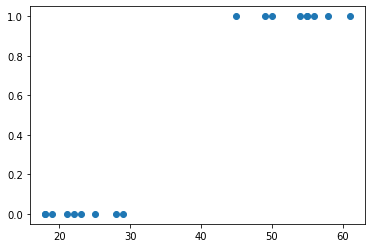

In [13]:
plt.scatter(x_train,reg.predict(x_train))

In [17]:
y_pred=reg.predict(x_train)
df=pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
print(df)
reg.score(x_test,y_test)

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        0          1
6        0          0
7        1          1
8        0          0
9        1          1
10       1          1
11       1          1
12       1          1
13       0          0
14       0          0
15       0          0
16       1          0
17       0          0


0.8888888888888888

PROBLEM STATEMENT 2 To find out Why Hr's are leaving the company

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

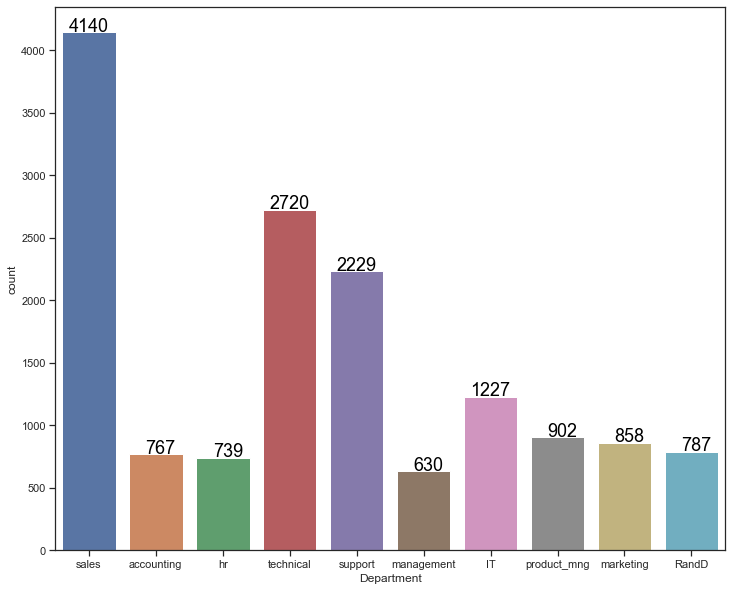

In [71]:
datas=pd.read_csv("D:/PYTHON/MachineLearning/DataSets/HR_comma_sep.csv")
plt.subplots(figsize=(12,10)) 
datas
ax=sns.countplot(x='Department', data=datas)
for p in ax.patches:
    #print(p)
    ax.annotate(p.get_height(),(p.get_x()+0.7, p.get_height()+50), ha='right', va='center', color='black', size=18)

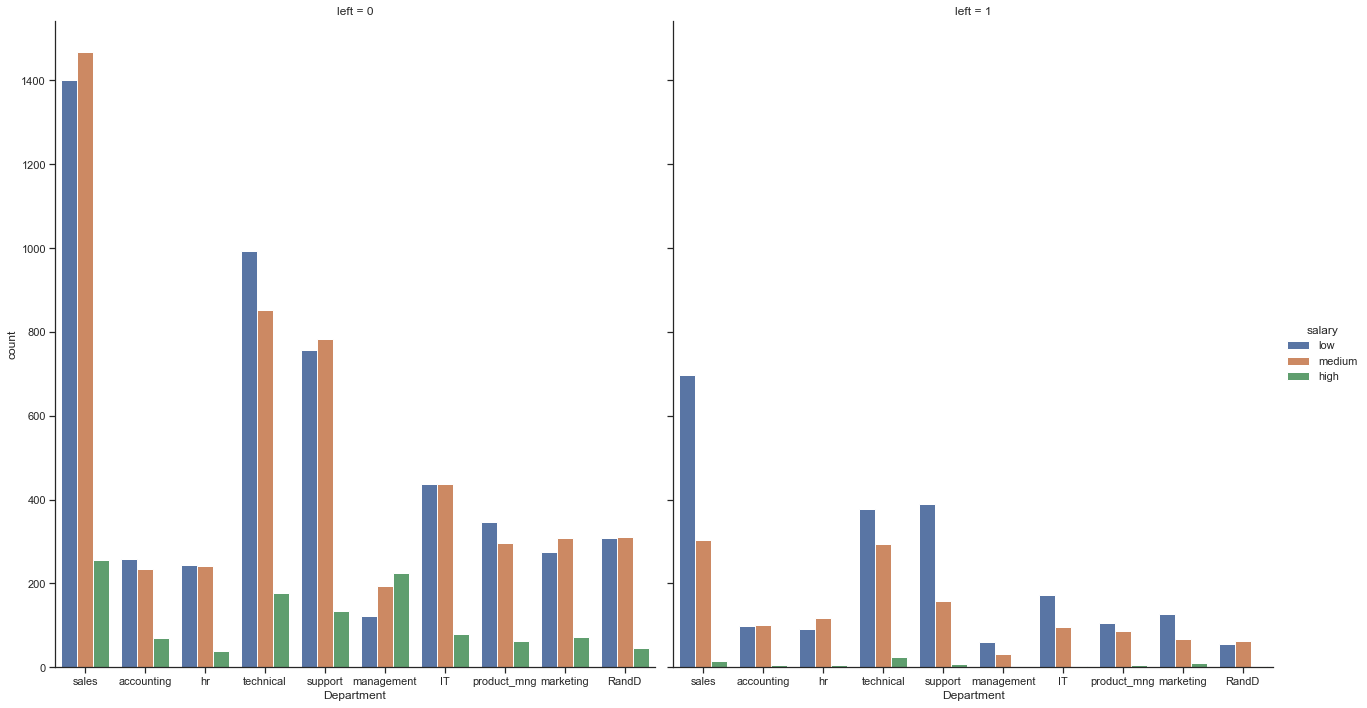

In [72]:
#Overall Analysis for all departments
#plt.subplots(figsize=(12,10)) 
sns.set_theme(style="ticks")
sns.catplot(x="Department", hue="salary", col="left",
                data=datas, kind="count",
                height=10, aspect=.9)

#By doing Overall analysis i am not able to understand why hr department is leaving the company so i wanted a saperate data sheet 
#specifically which included all datas related only for HR

left.shape
#print(left)

datas.groupby('left').mean()

In [73]:
df=datas[datas.Department=='hr']
df
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666679,0.720802,3.702290,199.250000,3.192748,0.156489,0.028626
1,0.433395,0.679721,3.539535,197.306977,3.753488,0.032558,0.000000


In [74]:
X=df[['satisfaction_level','number_project','promotion_last_5years','time_spend_company']]
y=df.left
print(len(X),len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg=LogisticRegression()
reg.fit(X_train,y_train)

739 739


LogisticRegression()

In [75]:
reg.score(X_test,y_test)

0.8063063063063063

In [76]:
def modl_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_train,y_train)

In [77]:
#just for knowledfe purpose
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12]):
    print("TRAIN",train_index,"TEST",test_index)

TRAIN [ 4  5  6  7  8  9 10 11] TEST [0 1 2 3]
TRAIN [ 0  1  2  3  8  9 10 11] TEST [4 5 6 7]
TRAIN [0 1 2 3 4 5 6 7] TEST [ 8  9 10 11]


In [83]:
a=[]
from sklearn.model_selection import StratifiedKFold
SKF=StratifiedKFold(n_splits=3)
for train_index,test_index in SKF.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    b=modl_score(LogisticRegression(),X_train, X_test, y_train, y_test)
    a.append(b)

In [85]:
print(a)

[0.7723577235772358, 0.7403651115618661, 0.7870182555780934]


In [80]:
print("Accuracy found for Logistic Regression is {}".format(sum(a)*100/3))

Accuracy found for Logistic Regression is 0.0


In [81]:
from sklearn.model_selection import cross_val_score
b=cross_val_score(LogisticRegression(),X,y).mean()
print("Accuracy found for Logistic Regression is {}".format(b))

Accuracy found for Logistic Regression is 0.7631182202610773
